#**Name:** Varsha
#**Roll No:** 200030040

##**AIM**



*   To understand the limitation of DTFT for the spectral analysis of speech.
*   To understand the development of short-term Fourier transform (STFT) representation.
*   To understand the difference in the nature of linear and log magnitude spectra.
*   To understand the effect of frame size on short term spectral analysi



## **THEORY**

*   The Discrete-Time Fourier Transform (DTFT) is a mathematical operation used in signal processing to analyze the frequency content of a discrete-time signal. It transforms a sequence of discrete data points into its equivalent continuous-frequency representation, providing a continuous spectrum.

*   Short-Time Fourier Transform (STFT) is a time-frequency analysis technique used to analyze and visualize the frequency content of a signal over short, overlapping time intervals. It breaks a signal into small time segments and calculates the Fourier Transform for each segment.

*   Rectangular Window: The rectangular window, also called the boxcar or Dirichlet window, is the simplest window function. It doesn't taper the signal; instead, it retains all data points within the window without any weighting.

*   Hanning Window: The Hanning window, also known as the Hann window, is a window function used in signal processing. It is characterized by a central lobe with smaller side lobes and is designed to minimize spectral leakage in the Fourier domain.

*   Hamming Window: The Hamming window is another window function used for smoothing and spectral analysis. It has a similar shape to the Hanning window but with slightly larger side lobes.

*   Linear Magnitude Spectrum: The linear magnitude spectrum represents the absolute amplitude of each frequency component in a signal. It measures the signal's strength at different frequencies without any logarithmic scaling, making it suitable for analyzing the amplitude of individual spectral components.

*    Log Magnitude Spectrum (dB): The log magnitude spectrum, often expressed in decibels (dB), represents the magnitude of frequency components on a logarithmic scale. It enhances the visibility of weaker spectral components and is commonly used for spectral analysis, audio processing, and visualizing frequency responses.

image.png




**Drive link :** https://drive.google.com/file/d/1SlUp0mnyVrksPVcqgOnhipQtdLNf1gJo/view?usp=sharing

##**CODE:**

In [139]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [140]:
import IPython.display as ipd
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq, fftshift
import librosa
import librosa.display
import math
from scipy.io import wavfile
import soundfile as sf



In [141]:
speech_file,sr= librosa.load('/content/drive/MyDrive/varsha_L4_1.wav',sr=16000)
ipd.Audio(speech_file, rate=sr)

In [142]:
plt.figure(figsize=(10,3))
librosa.display.waveshow(speech_file, sr=16000);
plt.title("Time Domain Plot of Speech Signal")
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

##**PART A:**

In [143]:
def magnitudeSpectrum(sound):
  sound_len = sound.shape[0]
  print(sound_len)
  sound_dtft = fft(sound)
  freqs = fftfreq(sound_len, 1/sr)
  freqs = freqs[0:sound_len//2]
  dtft_lin = np.abs(sound_dtft[0:sound_len//2])
  dtft_db = 20*np.log10(np.abs(sound_dtft[0:sound_len//2]))
  return freqs,dtft_lin,dtft_db

In [144]:
freqs,freq_lin,freq_db = magnitudeSpectrum(speech_file)
plt.figure(figsize=(8,3))
plt.plot(freqs,freq_lin)
plt.title("Linear Magnitude Spectrum of Speech Signal")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.show()

202489


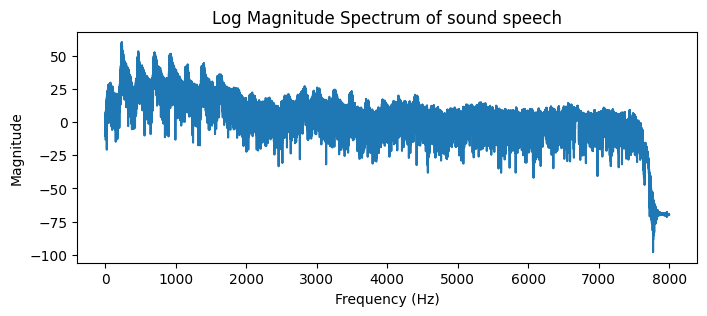

In [145]:
plt.figure(figsize=(8,3))
plt.plot(freqs,freq_db)
plt.title("Log Magnitude Spectrum of sound speech")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.show()

##**Vowel:**

In [146]:
A = speech_file[int(1.16 * sr): int(1.5 * sr)]
ipd.Audio(A, rate=sr)

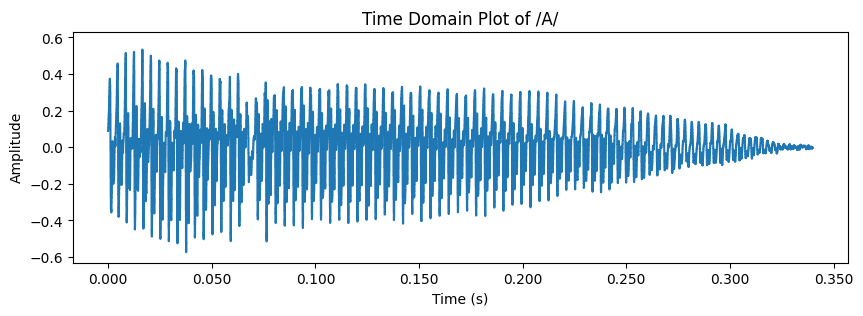

In [147]:
plt.figure(figsize=(10,3))
librosa.display.waveshow(A, sr=16000);
plt.title("Time Domain Plot of /A/")
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

5440


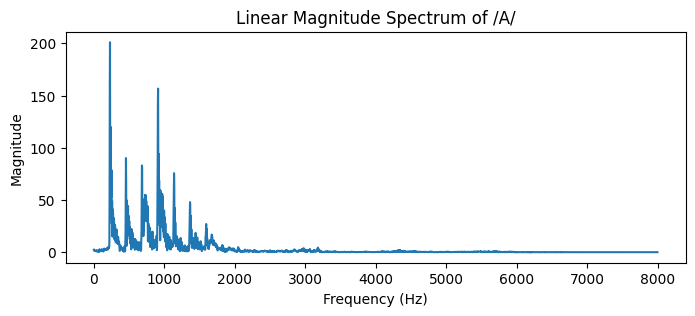

In [148]:
freqs,freq_lin,freq_db = magnitudeSpectrum(A)
plt.figure(figsize=(8,3))
plt.plot(freqs,freq_lin)
plt.title("Linear Magnitude Spectrum of /A/")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.show()

5440


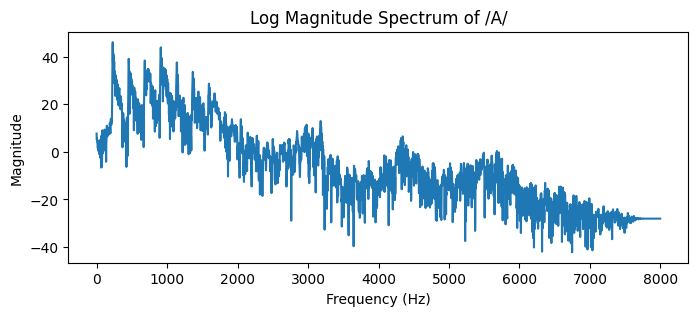

In [149]:
freqs,freq_lin,freq_db = magnitudeSpectrum(A)
plt.figure(figsize=(8,3))
plt.plot(freqs,freq_db)
plt.title("Log Magnitude Spectrum of /A/")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.show()

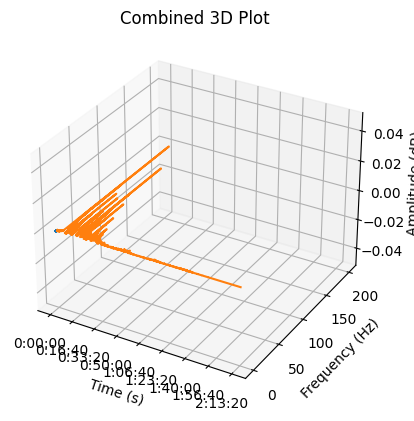

In [150]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
librosa.display.waveshow(A, sr=16000,ax=ax)
ax.plot(freqs,freq_lin)
ax.set_xlabel('Time (s)')
ax.set_ylabel('Frequency (Hz)')
ax.set_zlabel('Amplitude (dB)')
ax.set_title('Combined 3D Plot')

plt.show()

##**Nasal:**

In [151]:
n = speech_file[int(9 * sr): int(9.1 * sr)]
ipd.Audio(n, rate=sr)

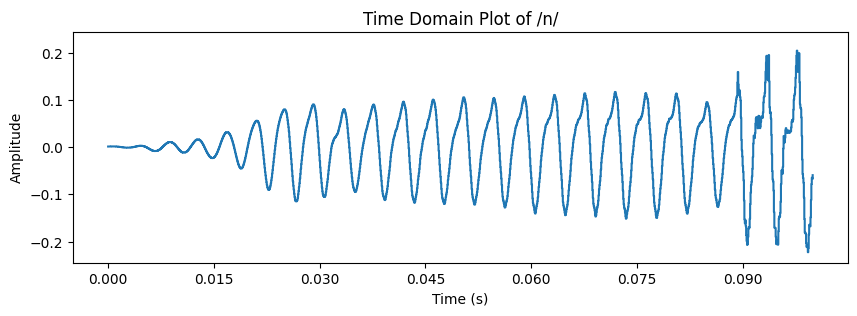

In [152]:
plt.figure(figsize=(10,3))
librosa.display.waveshow(n, sr=16000);
plt.title("Time Domain Plot of /n/")
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

1600


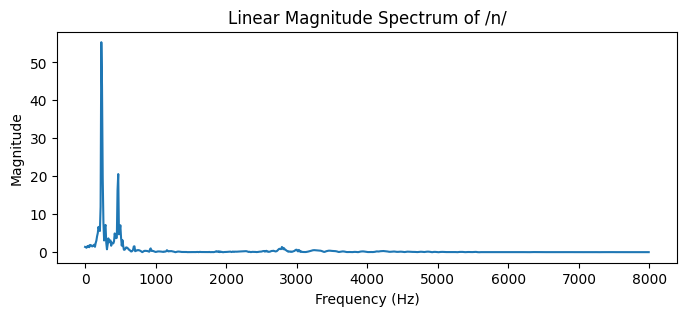

In [153]:
freqs,freq_lin,freq_db = magnitudeSpectrum(n)
plt.figure(figsize=(8,3))
plt.plot(freqs,freq_lin)
plt.title("Linear Magnitude Spectrum of /n/")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.show()

1600


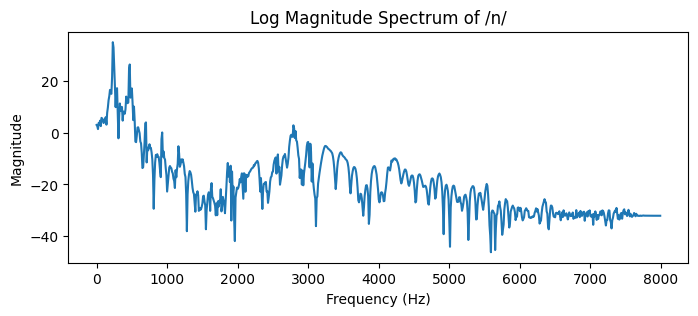

In [154]:
freqs,freq_lin,freq_db = magnitudeSpectrum(n)
plt.figure(figsize=(8,3))
plt.plot(freqs,freq_db)
plt.title("Log Magnitude Spectrum of /n/")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.show()

##**Unvoiced:**

In [155]:
pa = speech_file[int(6.32 * sr): int(6.36 * sr)]
ipd.Audio(pa, rate=sr)

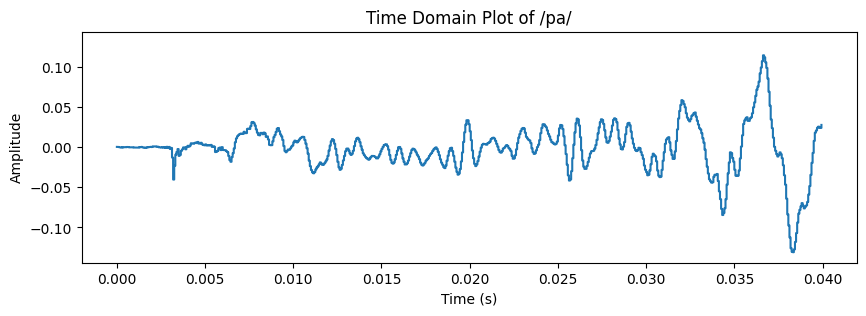

In [156]:
plt.figure(figsize=(10,3))
librosa.display.waveshow(pa, sr=16000);
plt.title("Time Domain Plot of /pa/")
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

640


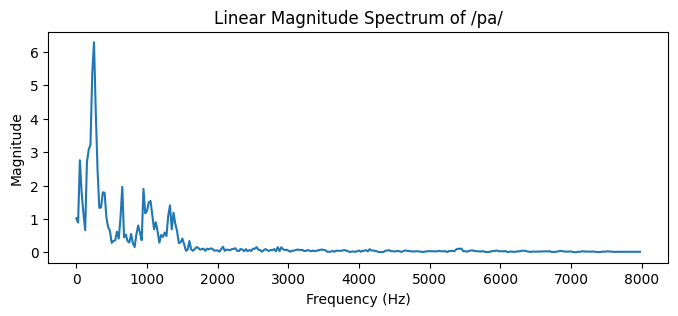

In [157]:
freqs,freq_lin,freq_db = magnitudeSpectrum(pa)
plt.figure(figsize=(8,3))
plt.plot(freqs,freq_lin)
plt.title("Linear Magnitude Spectrum of /pa/")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.show()

640


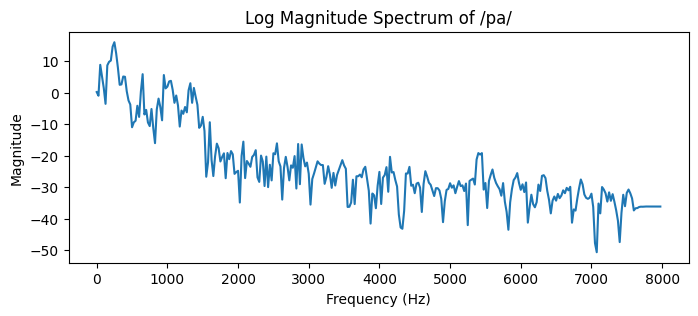

In [158]:
freqs,freq_lin,freq_db = magnitudeSpectrum(pa)
plt.figure(figsize=(8,3))
plt.plot(freqs,freq_db)
plt.title("Log Magnitude Spectrum of /pa/")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.show()

##**Silence:**

In [159]:
silence = speech_file[int(2.7 * sr): int(3.5 * sr)]
ipd.Audio(silence, rate=sr)

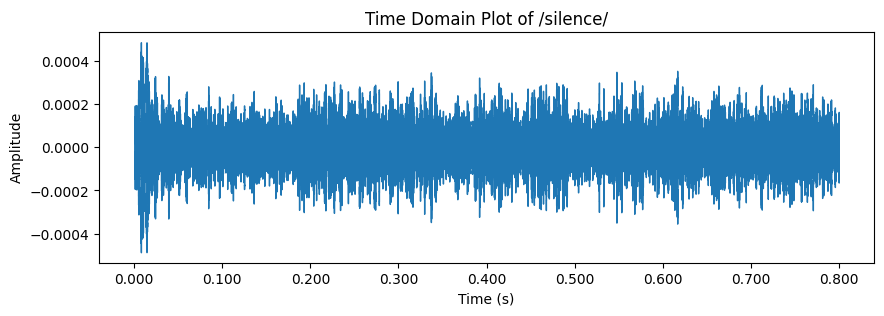

In [160]:
plt.figure(figsize=(10,3))
librosa.display.waveshow(silence, sr=16000);
plt.title("Time Domain Plot of /silence/")
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

12800


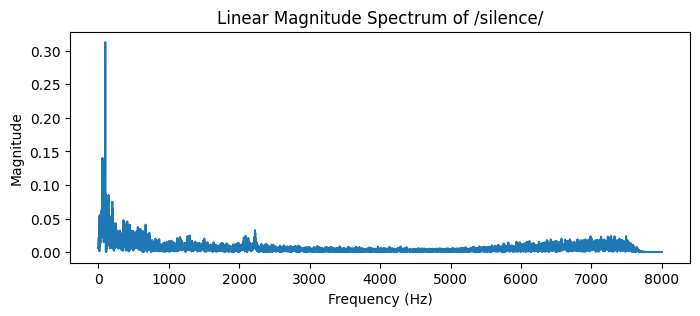

In [161]:
freqs,freq_lin,freq_db = magnitudeSpectrum(silence)
plt.figure(figsize=(8,3))
plt.plot(freqs,freq_lin)
plt.title("Linear Magnitude Spectrum of /silence/")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.show()

In [162]:
freqs,freq_lin,freq_db = magnitudeSpectrum(silence)
plt.figure(figsize=(8,3))
plt.plot(freqs,freq_db)
plt.title("Log Magnitude Spectrum of sound speech")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.show()

12800


##**PART B:**

##**30 ms:**

##**Vowel:**

In [163]:
A_30 = speech_file[int(1.315 * sr): int(1.345 * sr)]
ipd.Audio(A_30, rate=sr)

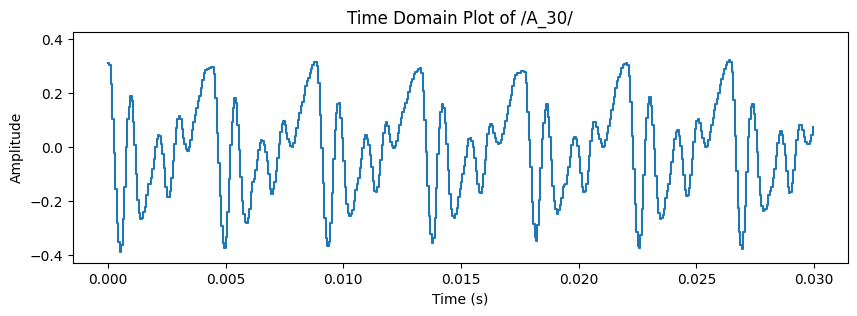

In [164]:
plt.figure(figsize=(10,3))
librosa.display.waveshow(A_30, sr=16000);
plt.title("Time Domain Plot of /A_30/")
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

480


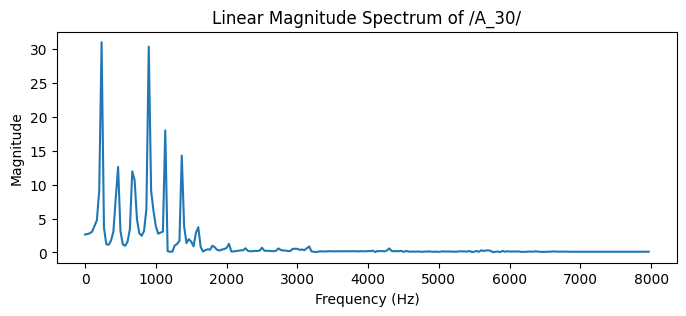

In [165]:
freqs,freq_lin,freq_db = magnitudeSpectrum(A_30)
plt.figure(figsize=(8,3))
plt.plot(freqs,freq_lin)
plt.title("Linear Magnitude Spectrum of /A_30/")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.show()

480


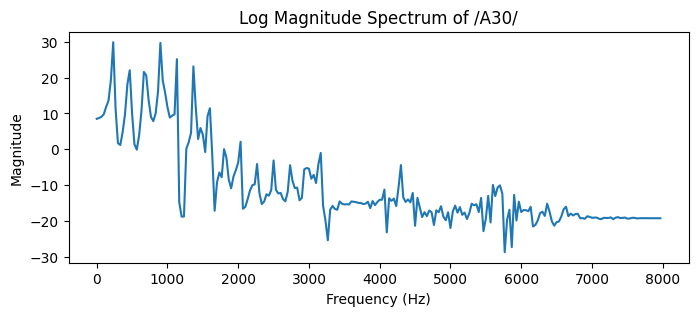

In [166]:
freqs,freq_lin,freq_db = magnitudeSpectrum(A_30)
plt.figure(figsize=(8,3))
plt.plot(freqs,freq_db)
plt.title("Log Magnitude Spectrum of /A30/")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.show()

##**Nasal:**

In [167]:
n_30 = speech_file[int(9.035 * sr): int(9.065 * sr)]
ipd.Audio(n_30, rate=sr)

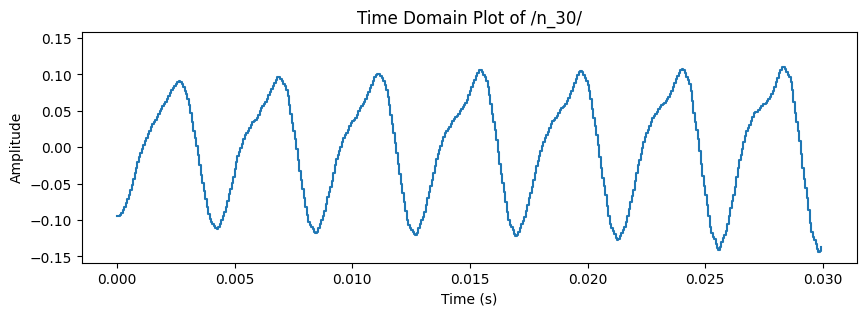

In [168]:
plt.figure(figsize=(10,3))
librosa.display.waveshow(n_30, sr=16000);
plt.title("Time Domain Plot of /n_30/")
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

##**Unvoiced:**

In [169]:
pa_30 = speech_file[int(6.325 * sr): int(6.355 * sr)]
print(pa_30.shape)
ipd.Audio(pa_30, rate=sr)

(480,)


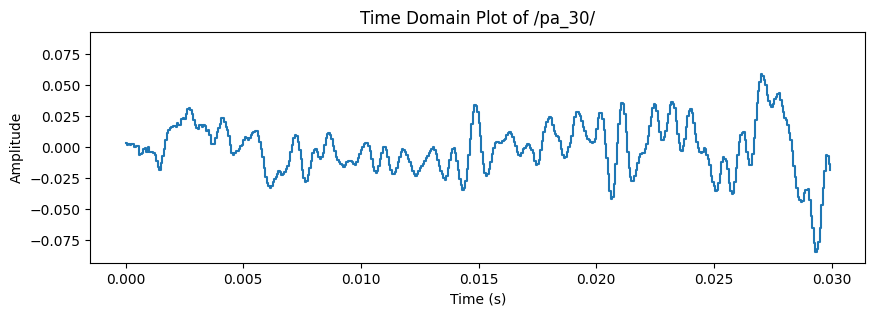

In [170]:
plt.figure(figsize=(10,3))
librosa.display.waveshow(pa_30, sr=16000);
plt.title("Time Domain Plot of /pa_30/")
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

##**Silence:**

In [171]:
sil_30 = speech_file[int(3.085 * sr): int(3.115 * sr)]
ipd.Audio(silence, rate=sr)

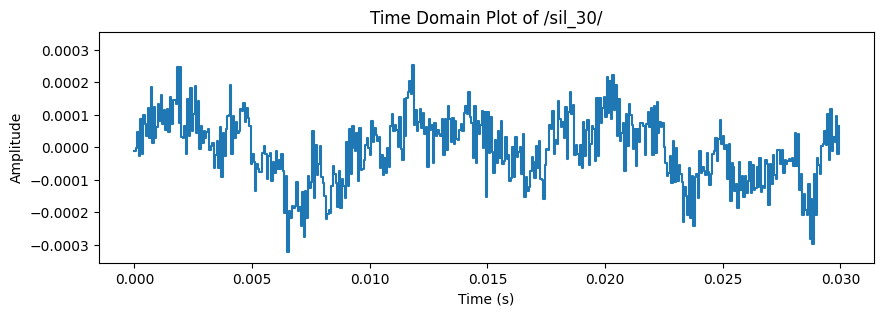

In [172]:
plt.figure(figsize=(10,3))
librosa.display.waveshow(sil_30, sr=16000);
plt.title("Time Domain Plot of /sil_30/")
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

##**PART C:**

##**C 1:**

##**Hamming window:**

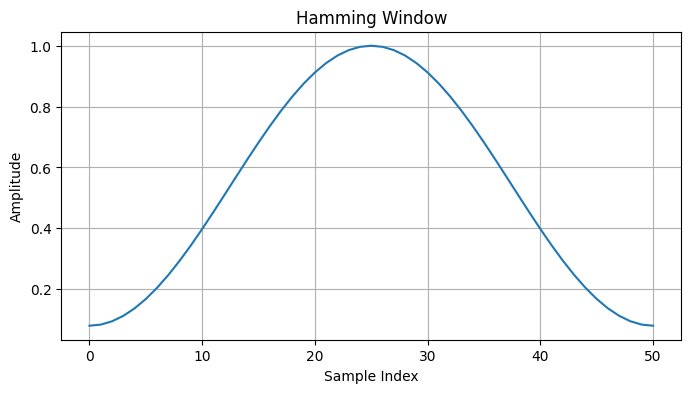

In [173]:
window_length = 51

# Generate the Hamming window
hamming_window = np.hamming(window_length)

# Create a time vector
time_vector = np.arange(0, window_length)

# Plot the Hamming window in the time domain
plt.figure(figsize=(8, 4))
plt.plot(time_vector, hamming_window)
plt.title('Hamming Window')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

In [174]:
window = np.hamming(51)

# Compute the FFT of the Hamming window
A = fft(window, 2048) / 25.5

# Calculate the magnitude spectrum
mag = np.abs(fftshift(A))
N = len(mag)
positive_freq_indices = np.arange(N // 2, N)
positive_mag = mag[positive_freq_indices]

# Calculate the corresponding frequencies
freq = np.linspace(0, 0.5, len(positive_mag))

# Convert magnitude to dB
response = 20 * np.log10(positive_mag)
response = np.clip(response, -100, 100)

# Plot the linear magnitude spectrum
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.plot(freq, positive_mag)
plt.title("Linear Magnitude Spectrum of Hamming Window")
plt.ylabel("Magnitude")
plt.xlabel("Normalized Frequency [cycles per sample]")
plt.grid(True)

# Plot the log magnitude spectrum
plt.subplot(122)
plt.plot(freq, response)
plt.title("Log Magnitude Spectrum of Hamming Window")
plt.ylabel("Magnitude [dB]")
plt.xlabel("Normalized Frequency [cycles per sample]")
plt.grid(True)

plt.tight_layout()
plt.show()

##**Rectangular window:**

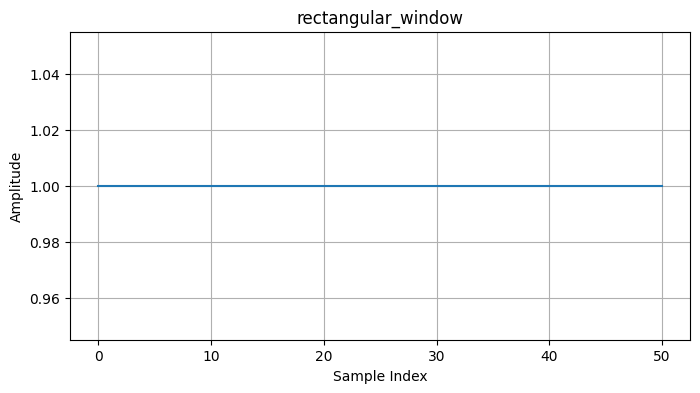

In [175]:
window_length = 51
rectangular_window = np.ones(window_length)

# Create a time vector
time_vector = np.arange(0, window_length)
plt.figure(figsize=(8, 4))
plt.plot(time_vector, rectangular_window)
plt.title('rectangular_window')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

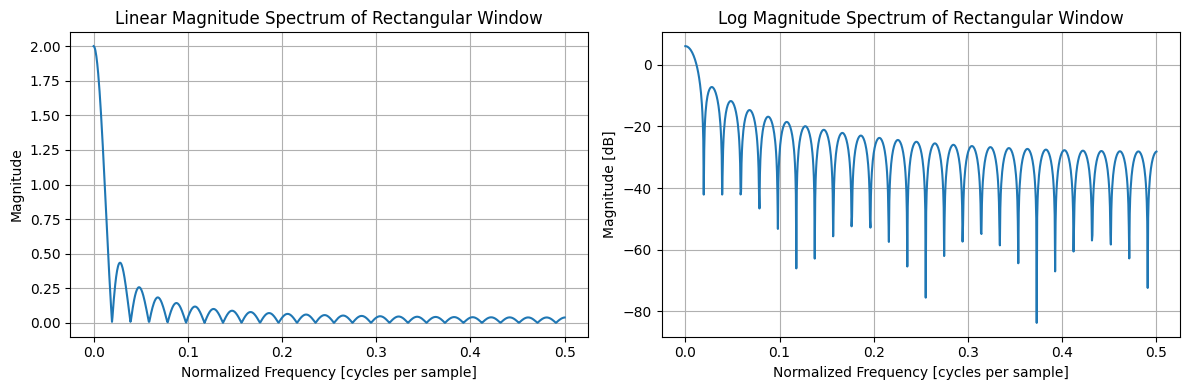

In [176]:
window = rectangular_window
A = fft(window, 2048) / 25.5
mag = np.abs(fftshift(A))
N = len(mag)
positive_freq_indices = np.arange(N // 2, N)
positive_mag = mag[positive_freq_indices]
freq = np.linspace(0, 0.5, len(positive_mag))

# Convert magnitude to dB
response = 20 * np.log10(positive_mag)
response = np.clip(response, -100, 100)

plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.plot(freq, positive_mag)
plt.title("Linear Magnitude Spectrum of Rectangular Window")
plt.ylabel("Magnitude")
plt.xlabel("Normalized Frequency [cycles per sample]")
plt.grid(True)

plt.subplot(122)
plt.plot(freq, response)
plt.title("Log Magnitude Spectrum of Rectangular Window")
plt.ylabel("Magnitude [dB]")
plt.xlabel("Normalized Frequency [cycles per sample]")
plt.grid(True)

plt.tight_layout()
plt.show()

##**Hanning window:**

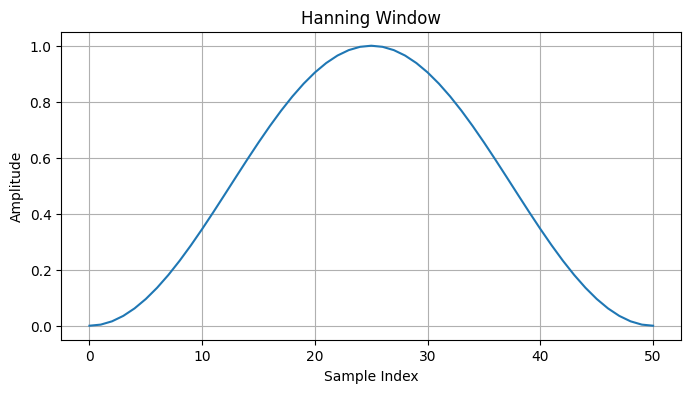

In [177]:
window_length = 51

hanning_window = np.hanning(window_length)

# Create a time vector
time_vector = np.arange(0, window_length)

plt.figure(figsize=(8, 4))
plt.plot(time_vector, hanning_window)
plt.title('Hanning Window')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

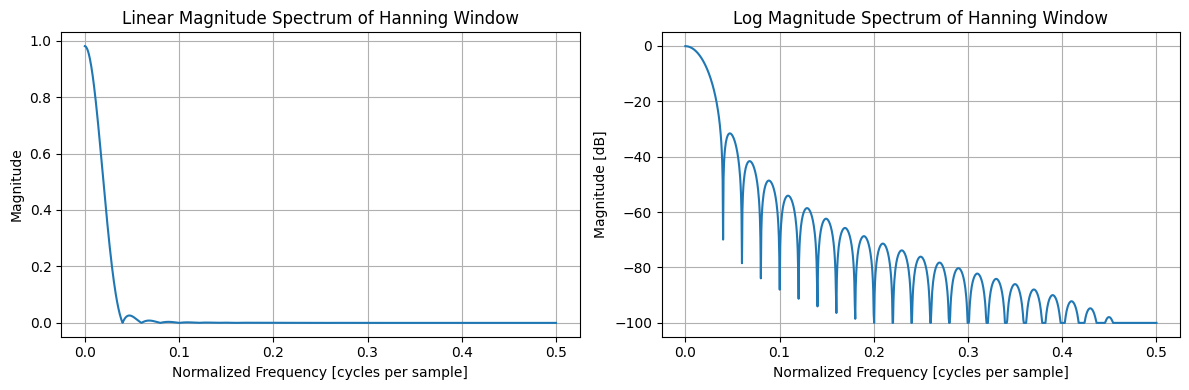

In [178]:
window = np.hanning(51)

A = fft(window, 2048) / 25.5

mag = np.abs(fftshift(A))
N = len(mag)
positive_freq_indices = np.arange(N // 2, N)  # Select right half
positive_mag = mag[positive_freq_indices]

freq = np.linspace(0, 0.5, len(positive_mag))

# Convert magnitude to dB
response = 20 * np.log10(positive_mag)
response = np.clip(response, -100, 100)

plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.plot(freq, positive_mag)
plt.title("Linear Magnitude Spectrum of Hanning Window")
plt.ylabel("Magnitude")
plt.xlabel("Normalized Frequency [cycles per sample]")
plt.grid(True)

plt.subplot(122)
plt.plot(freq, response)
plt.title("Log Magnitude Spectrum of Hanning Window")
plt.ylabel("Magnitude [dB]")
plt.xlabel("Normalized Frequency [cycles per sample]")
plt.grid(True)

plt.tight_layout()
plt.show()

##**C 2:**

In [179]:
A_30 = speech_file[int(1.315 * sr): int(1.345 * sr)]
ipd.Audio(A, rate=sr)

/usr/local/lib/python3.10/dist-packages/IPython/lib/display.py:159: ComplexWarning: Casting complex values to real discards the imaginary part
  data = np.array(data, dtype=float)


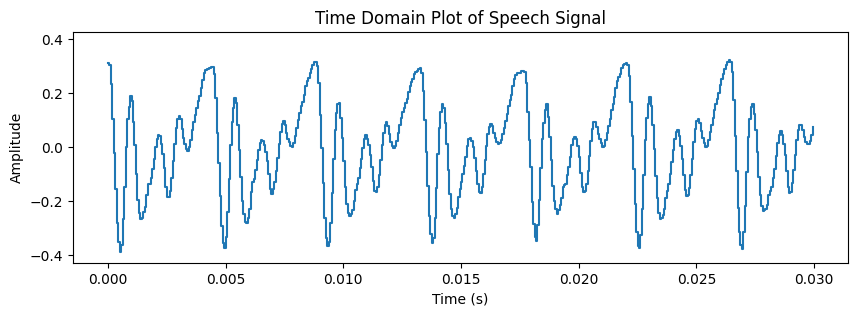

In [180]:
plt.figure(figsize=(10,3))
librosa.display.waveshow(A_30, sr=16000);
plt.title("Time Domain Plot of Speech Signal")
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

480


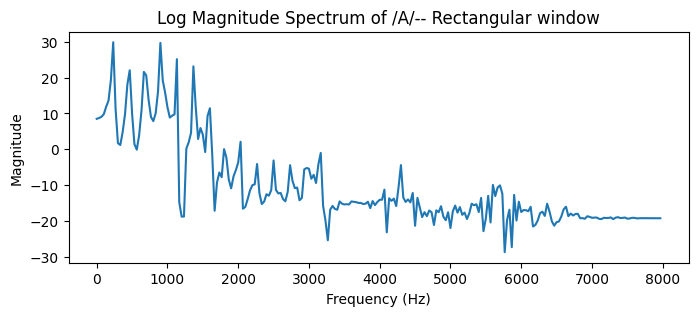

In [181]:
freqs,freq_lin,freq_db = magnitudeSpectrum(A_30)
plt.figure(figsize=(8,3))
plt.plot(freqs,freq_db)
plt.title("Log Magnitude Spectrum of /A/-- Rectangular window")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.show()

480


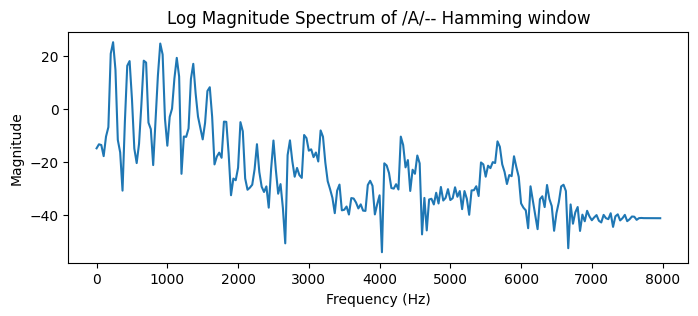

In [182]:
hamming_window = np.hamming(480)
A_hm = A_30*hamming_window
freqs,freq_lin,freq_db = magnitudeSpectrum(A_hm)
plt.figure(figsize=(8,3))
plt.plot(freqs,freq_db)
plt.title("Log Magnitude Spectrum of /A/-- Hamming window")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.show()

In [183]:
hanning_window = np.hanning(480)
A_hn = A_30*hanning_window
freqs,freq_lin,freq_db = magnitudeSpectrum(A_hn)
plt.figure(figsize=(8,3))
plt.plot(freqs,freq_db)
plt.title("Log Magnitude Spectrum of /A/-- Hanning window")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.show()

480


##**C 3:**

In [184]:

fs = 4000
n = np.linspace(0.0, 1.0, int(fs * 1), endpoint=False)
n = n.reshape(len(n), 1)

frequencies = np.array([0.1, 20, 100])

sines = np.sin(2.0 * np.pi * frequencies * n)
print(sines.shape)
plt.figure(figsize=(12, 4))
plt.plot(n, sines)
plt.title('Multitone Sine Wave Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend(['0.1 Hz', '20 Hz', '100 Hz'])
plt.grid(True)
plt.show()


(4000, 3)


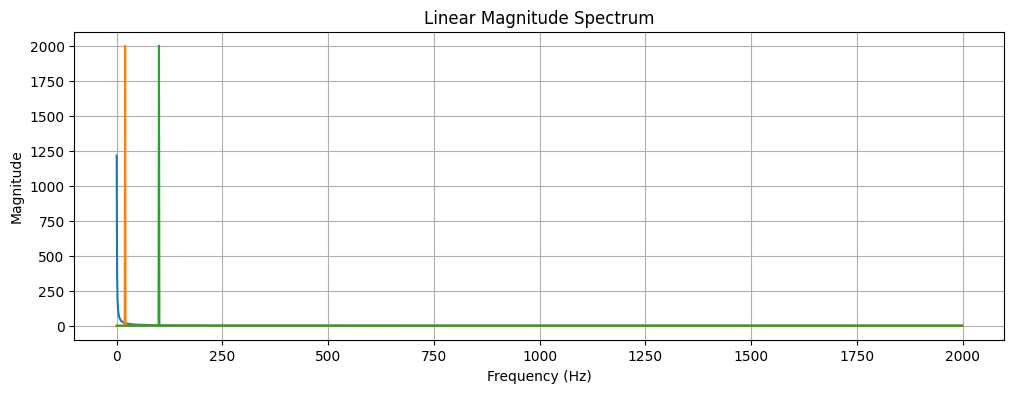

In [185]:
# Calculate the FFT
fft_result = np.fft.fft(sines, axis=0)
num_points = len(sines)
frequencies = np.fft.fftfreq(num_points, 1/fs)

magnitude_spectrum = np.abs(fft_result)

positive_frequencies = frequencies[:num_points//2]
positive_magnitude_spectrum = magnitude_spectrum[:num_points//2]
log_magnitude_spectrum = 20 * np.log10(magnitude_spectrum)
positive_log_magnitude_spectrum = log_magnitude_spectrum[:len(log_magnitude_spectrum)//2]

plt.figure(figsize=(12, 4))
plt.plot(positive_frequencies, positive_magnitude_spectrum)
plt.title('Linear Magnitude Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.show()

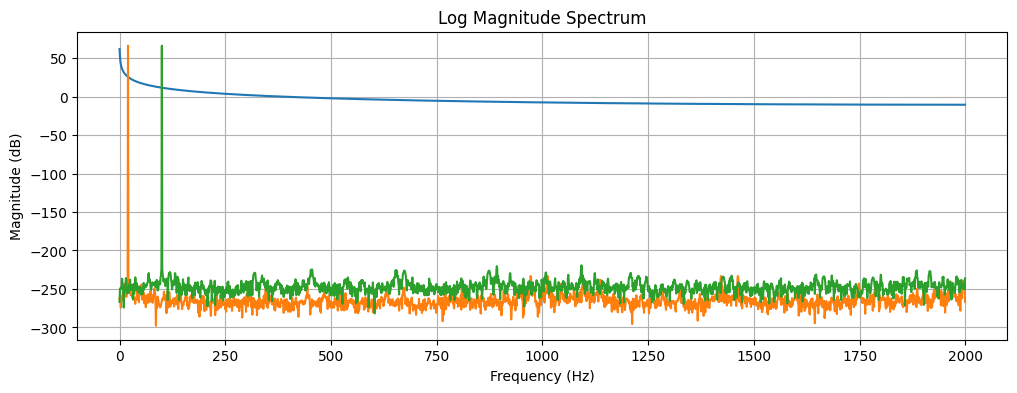

In [186]:
plt.figure(figsize=(12, 4))
plt.plot(positive_frequencies, positive_log_magnitude_spectrum)
plt.title('Log Magnitude Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (dB)')
plt.grid(True)
plt.show()

##**3 ms:**

(12, 3)


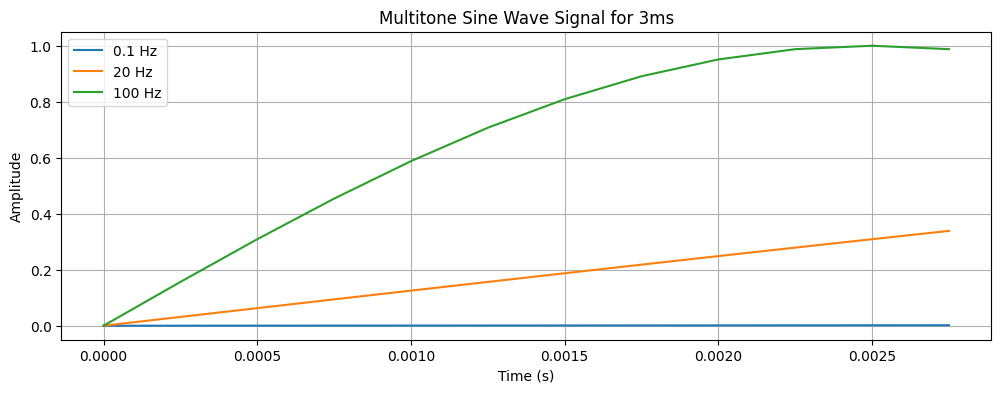

In [187]:
sines_3 = sines[0:12,:]
n_3 = np.linspace(0.0, 0.003, int(4000 * 0.003), endpoint=False)
print(sines_3.shape)
plt.figure(figsize=(12, 4))
plt.plot(n_3, sines_3)
plt.title('Multitone Sine Wave Signal for 3ms')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend(['0.1 Hz', '20 Hz', '100 Hz'])
plt.grid(True)
plt.show()


In [188]:
# Calculate the FFT
fft_result_3 = np.fft.fft(sines_3, axis=0)

num_points_3 = len(sines_3)
frequencies_3 = np.fft.fftfreq(num_points_3, 1/4000)

# Calculate the magnitude spectrum (absolute value of the FFT)
magnitude_spectrum_3 = np.abs(fft_result_3)

positive_frequencies_3 = frequencies_3[:num_points_3//2]
positive_magnitude_spectrum_3 = magnitude_spectrum_3[:num_points_3//2]
log_magnitude_spectrum_3 = 20 * np.log10(magnitude_spectrum_3)
positive_log_magnitude_spectrum_3 = log_magnitude_spectrum_3[:len(log_magnitude_spectrum_3)//2]

plt.figure(figsize=(12, 4))
plt.plot(positive_frequencies_3, positive_magnitude_spectrum_3)
plt.title('Linear Magnitude Spectrum for 3 ms')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.show()

In [189]:
plt.figure(figsize=(12, 4))
plt.plot(positive_frequencies_3, positive_log_magnitude_spectrum_3)
plt.title('Log Magnitude Spectrum for 3 ms')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (dB)')
plt.grid(True)
plt.show()

##**30 ms:**

(120, 3)


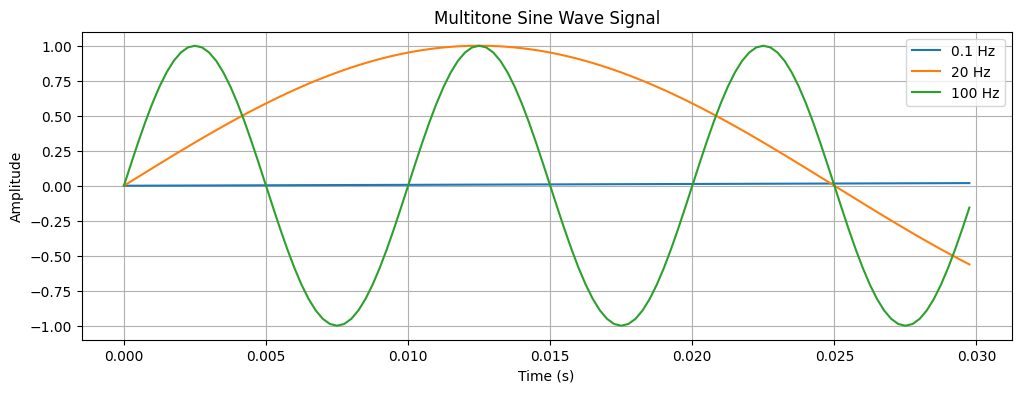

In [190]:
sines_30 = sines[0:120,:]
n_30 = np.linspace(0.0, 0.03, int(4000 * 0.03), endpoint=False)
print(sines_30.shape)
plt.figure(figsize=(12, 4))
plt.plot(n_30, sines_30)
plt.title('Multitone Sine Wave Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend(['0.1 Hz', '20 Hz', '100 Hz'])
plt.grid(True)
plt.show()


(60,)
(60, 3)


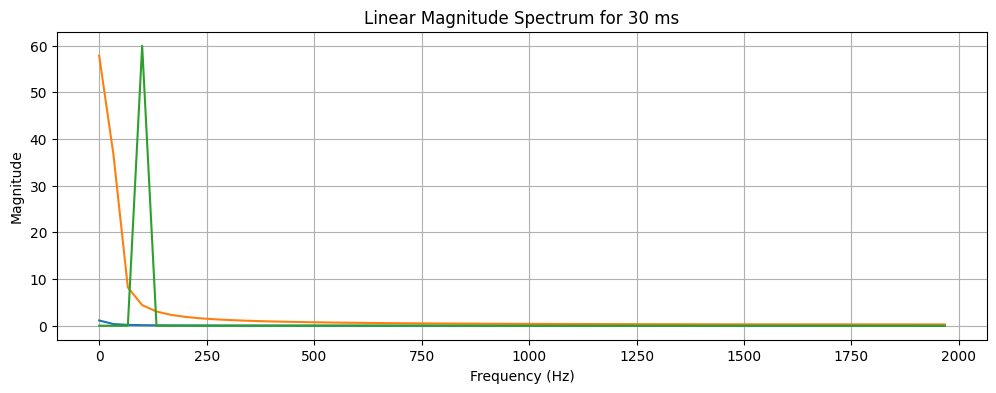

In [191]:
# Calculate the FFT
fft_result_30 = np.fft.fft(sines_30, axis=0)
num_points_30 = len(sines_30)
frequencies_30 = np.fft.fftfreq(num_points_30, 1/4000)
magnitude_spectrum_30 = np.abs(fft_result_30)

positive_frequencies_30 = frequencies_30[:num_points_30//2]
positive_magnitude_spectrum_30 = magnitude_spectrum_30[:num_points_30//2]
log_magnitude_spectrum_30 = 20 * np.log10(magnitude_spectrum_30)
positive_log_magnitude_spectrum_30 = log_magnitude_spectrum_30[:len(log_magnitude_spectrum_30)//2]
print(positive_frequencies_30.shape)
print(positive_magnitude_spectrum_30.shape)
plt.figure(figsize=(12, 4))
plt.plot(positive_frequencies_30, positive_magnitude_spectrum_30)
plt.title('Linear Magnitude Spectrum for 30 ms')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.show()

In [192]:
plt.figure(figsize=(12, 4))
plt.plot(positive_frequencies_30, positive_log_magnitude_spectrum_30)
plt.title('Log Magnitude Spectrum for 30 ms')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (dB)')
plt.grid(True)
plt.show()

##**300 ms:**

(1200, 3)


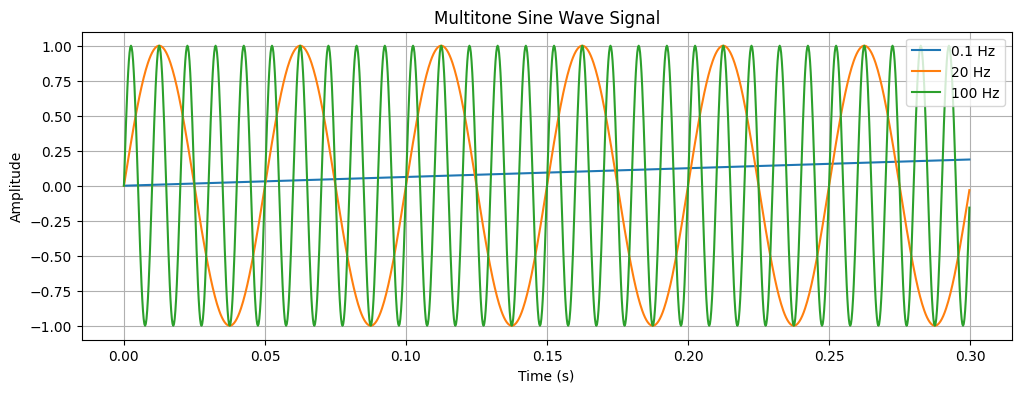

In [193]:
sines_300 = sines[0:1200,:]
n_300 = np.linspace(0.0, 0.3, int(4000 * 0.3), endpoint=False)
print(sines_300.shape)
plt.figure(figsize=(12, 4))
plt.plot(n_300, sines_300)
plt.title('Multitone Sine Wave Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend(['0.1 Hz', '20 Hz', '100 Hz'])
plt.grid(True)
plt.show()


(600,)
(600, 3)


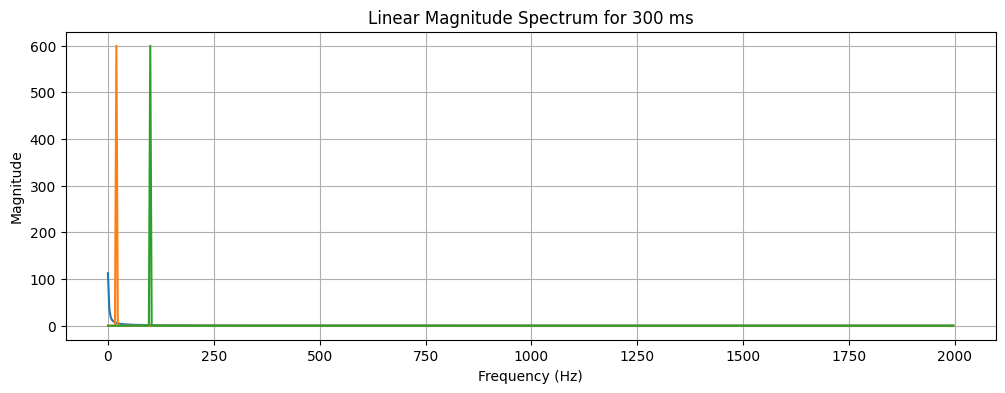

In [194]:
# Calculate the FFT
fft_result_300 = np.fft.fft(sines_300, axis=0)

num_points_300 = len(sines_300)
frequencies_300 = np.fft.fftfreq(num_points_300, 1/4000)

magnitude_spectrum_300 = np.abs(fft_result_300)

positive_frequencies_300 = frequencies_300[:num_points_300//2]
positive_magnitude_spectrum_300 = magnitude_spectrum_300[:num_points_300//2]
log_magnitude_spectrum_300 = 20 * np.log10(magnitude_spectrum_300)
positive_log_magnitude_spectrum_300 = log_magnitude_spectrum_300[:len(log_magnitude_spectrum_300)//2]
print(positive_frequencies_300.shape)
print(positive_magnitude_spectrum_300.shape)
plt.figure(figsize=(12, 4))
plt.plot(positive_frequencies_300, positive_magnitude_spectrum_300)
plt.title('Linear Magnitude Spectrum for 300 ms')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.show()

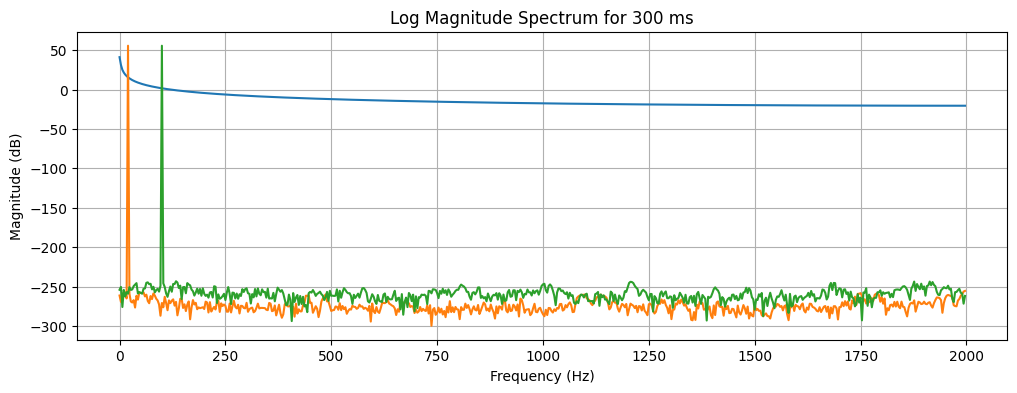

In [195]:
plt.figure(figsize=(12, 4))
plt.plot(positive_frequencies_300, positive_log_magnitude_spectrum_300)
plt.title('Log Magnitude Spectrum for 300 ms')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (dB)')
plt.grid(True)
plt.show()

##**C 4:**

##**300 ms:**

##**Vowel:**

In [196]:
A_300 = speech_file[int(1.18 * sr): int(1.48 * sr)]
ipd.Audio(A_300, rate=sr)

4800


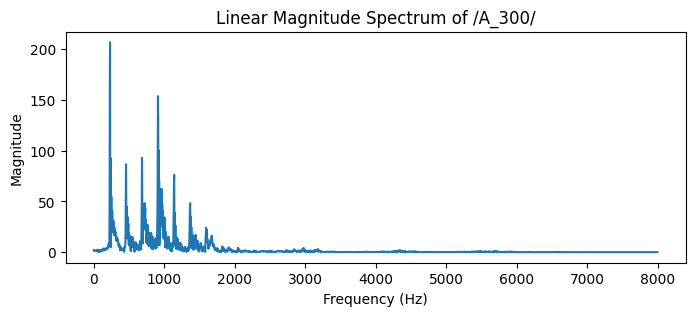

In [197]:
freqs,freq_lin,freq_db = magnitudeSpectrum(A_300)
plt.figure(figsize=(8,3))
plt.plot(freqs,freq_lin)
plt.title("Linear Magnitude Spectrum of /A_300/")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.show()

In [198]:
freqs,freq_lin,freq_db = magnitudeSpectrum(A_300)
plt.figure(figsize=(8,3))
plt.plot(freqs,freq_db)
plt.title("Log Magnitude Spectrum of /A_300/")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.show()

4800


In [199]:
hamming_window = np.hamming(4800)
A_hm_300 = A_300*hamming_window
freqs,freq_lin,freq_db = magnitudeSpectrum(A_hm_300)
plt.figure(figsize=(8,3))
plt.plot(freqs,freq_db)
plt.title("Log Magnitude Spectrum of /A_300/")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.show()

4800


4800


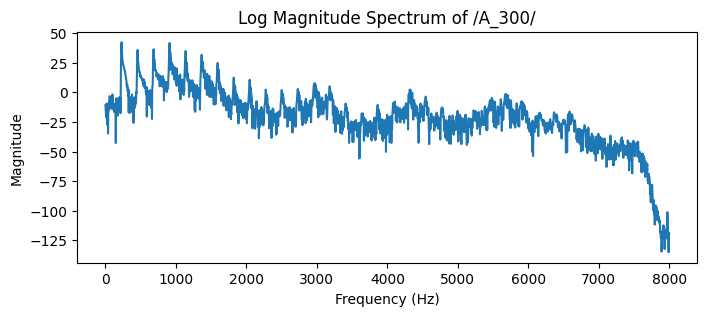

In [200]:
hanning_window = np.hanning(4800)
A_hn_300 = A_300*hanning_window
freqs,freq_lin,freq_db = magnitudeSpectrum(A_hn_300)
plt.figure(figsize=(8,3))
plt.plot(freqs,freq_db)
plt.title("Log Magnitude Spectrum of /A_300/")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.show()

##**30 ms:**

##**Vowel:**

In [201]:
A_30 = speech_file[int(1.315 * sr): int(1.345 * sr)]
ipd.Audio(A_30, rate=sr)

480


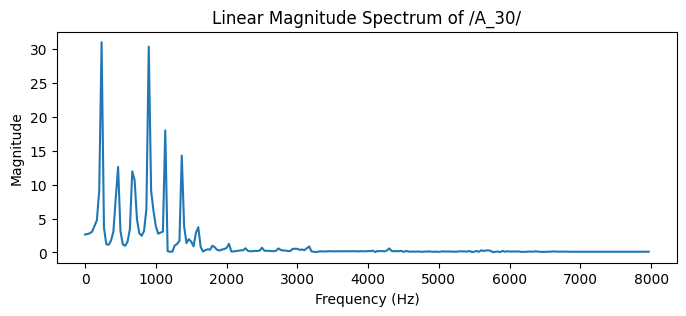

In [202]:
freqs,freq_lin,freq_db = magnitudeSpectrum(A_30)
plt.figure(figsize=(8,3))
plt.plot(freqs,freq_lin)
plt.title("Linear Magnitude Spectrum of /A_30/")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.show()

In [203]:
freqs,freq_lin,freq_db = magnitudeSpectrum(A_30)
plt.figure(figsize=(8,3))
plt.plot(freqs,freq_db)
plt.title("Log Magnitude Spectrum of /A_30/")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.show()

480


480


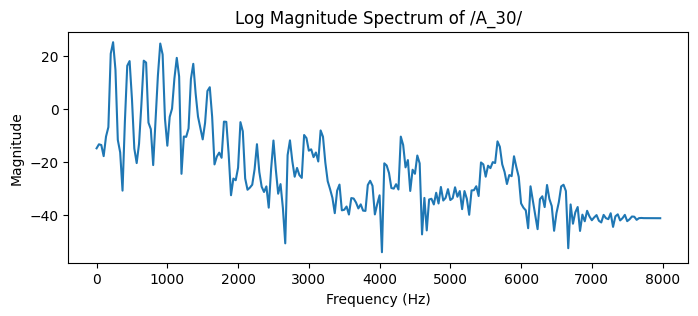

In [204]:
hamming_window = np.hamming(480)
A_hm = A_30*hamming_window
freqs,freq_lin,freq_db = magnitudeSpectrum(A_hm)
plt.figure(figsize=(8,3))
plt.plot(freqs,freq_db)
plt.title("Log Magnitude Spectrum of /A_30/")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.show()

480


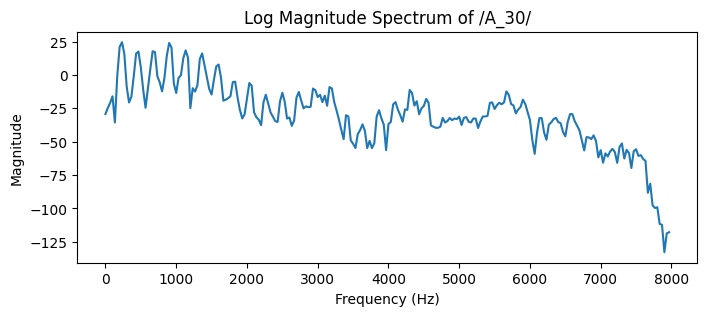

In [205]:
hanning_window = np.hanning(480)
A_hn = A_30*hanning_window
freqs,freq_lin,freq_db = magnitudeSpectrum(A_hn)
plt.figure(figsize=(8,3))
plt.plot(freqs,freq_db)
plt.title("Log Magnitude Spectrum of /A_30/")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.show()

##**3 ms:**

##**Vowel:**

In [206]:
A_3 = speech_file[int(1.3285 * sr): int(1.3315 * sr)]
ipd.Audio(A_3, rate=sr)

48


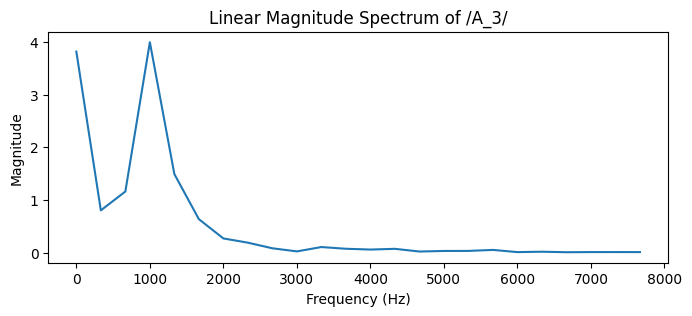

In [207]:
freqs,freq_lin,freq_db = magnitudeSpectrum(A_3)
plt.figure(figsize=(8,3))
plt.plot(freqs,freq_lin)
plt.title("Linear Magnitude Spectrum of /A_3/")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.show()

48


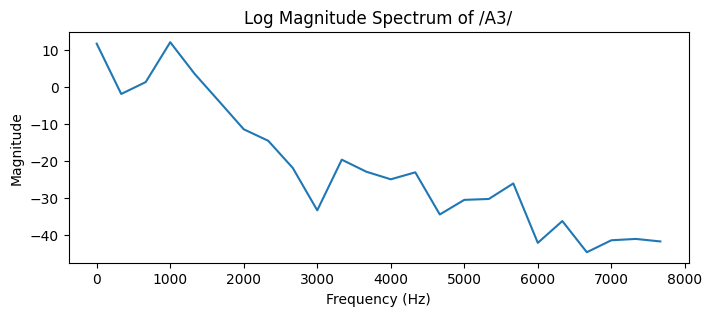

In [208]:
freqs,freq_lin,freq_db = magnitudeSpectrum(A_3)
plt.figure(figsize=(8,3))
plt.plot(freqs,freq_db)
plt.title("Log Magnitude Spectrum of /A3/")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.show()

In [209]:
hamming_window = np.hamming(48)
A_hm_3 = A_3*hamming_window
freqs,freq_lin,freq_db = magnitudeSpectrum(A_hm_3)
plt.figure(figsize=(8,3))
plt.plot(freqs,freq_db)
plt.title("Log Magnitude Spectrum of /A3/")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.show()

48


48


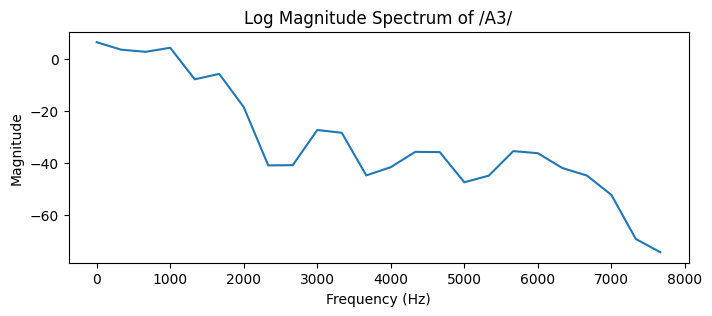

In [210]:
hanning_window = np.hanning(48)
A_hn_3 = A_3*hanning_window
freqs,freq_lin,freq_db = magnitudeSpectrum(A_hn_3)
plt.figure(figsize=(8,3))
plt.plot(freqs,freq_db)
plt.title("Log Magnitude Spectrum of /A3/")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.show()